### Laboratorium 5

Interpolacja

### Zadania
- Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation_v2.pdf"> wielomian interpolacyjny  Lagrange'a </a>. Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. 

- Zrobic to samo dla metody <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation_v2.pdf"> Newtona (metoda ilorazów róznicowych)</a>. Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

- Zastosowac interpolację wielomianową z pakietu Polynomials (jesli wybralismy Julie) albo z 
funkcji <i> gsl_interp_polynomial</i> z pakietu <a href="https://www.gnu.org/software/gsl/doc/html/interp.html#">GSL</a> (jesli wybraliśmy C) do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

- Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.  Narzedzie do analizy danych do wyboru (Julia, R)

- Poeksperymentowac z  interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane),  narysowac wykresy i porownac z wykresami interpolacji wielomianowej. 

- Zademonstrowac  efekt Rungego. 

- Zbadać i zademonstrować podczas zajęc rózne algorytmy interpolacji stosowane w grafice komputerowej (np. do zmiany wielkości obrazu). Można korzystac z gotowych rozwiazań, ale trzeba wiedzieć, jak te algorytmy dzialaja. Do zaliczenia tego zadania potrzebne jest demonstracja i porownanie działania conajmniej dwóch metod.

In [1]:
using Plots

In [30]:
#Interpolacja Lagrange'a
function LagrangeInt(x_tab, y_tab, x)
    p_n = 0
#     dla wygody implementacji
#     ustalamy, że dostajemy n zamiast n+1 węzłów
    n = size(x_tab,1) 
    for k = 1:n
        y_k = y_tab[k]
        l_k=1
        for i = 1:n
            if(i != k)
                l_k = l_k*(x-x_tab[i])/(x_tab[k]-x_tab[i])
            end            
        end
        p_k = l_k * y_k
        p_n += p_k
    end
    p_n
end

LagrangeInt (generic function with 1 method)

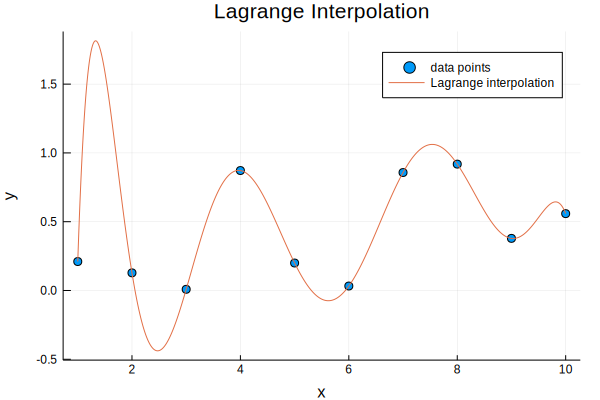

In [31]:
xs =  1:1:10
ys = [rand() for x in xs]
scatter(xs,ys, label="data points")
xsf=1:0.01:10
La=[LagrangeInt(xs,ys,x) for x in xsf]
plot!(xsf,La, label="Lagrange interpolation",title="Lagrange Interpolation",
xlabel = "x", ylabel="y")

In [32]:
#Interpolacja Newtona


function diffForI(x_tab,div_tab, i)
    n = length(x_tab)
    diffs = zeros(n)
    for j=1:n-i
        diffs[j]=(div_tab[j + 1, i + 1] - div_tab[j, i + 1])/
        (x_tab[j + i] - x_tab[j])
    end
    div_tab[:,2+i] = diffs
end

            
function makeDividedDiffTable(x_tab, y_tab)
    n = length(x_tab)
    divDiffs=zeros(n, n+2)
    divDiffs[:,1] = x_tab
    divDiffs[:,2] = y_tab
    for i=1:n
        diffForI(x_tab, divDiffs, i)
    end
    return divDiffs
end

function NewtonInt(divDiff, x)
    
    p_n = divDiff[1,2]
    n = length(divDiff[:,1]) - 1
    for i=1:n
        prod = divDiff[1, i + 2]
        for j=1:i
            prod *= (x - divDiff[j,1])
        end
        p_n += prod
    end
    p_n
end


NewtonInt (generic function with 2 methods)

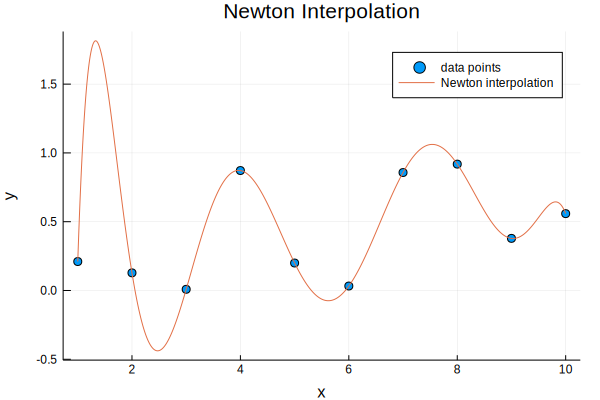

In [33]:
scatter(xs,ys, label="data points")
divDiff = makeDividedDiffTable(xs, ys)
Ne=[NewtonInt(divDiff,x) for x in xsf]
plot!(xsf,Ne, label="Newton interpolation",title="Newton Interpolation",
xlabel = "x", ylabel="y")

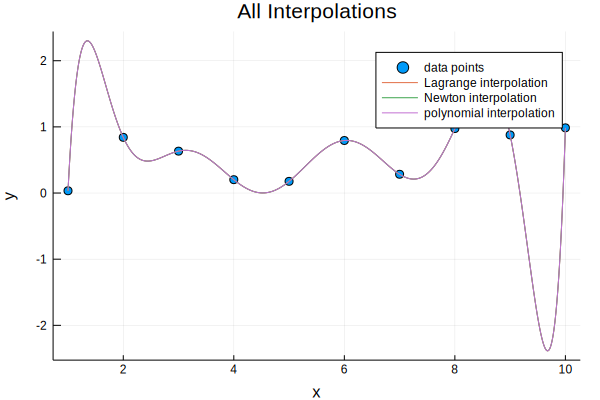

In [34]:
xs =  1:1:10
ys = [rand() for x in xs]
scatter(xs,ys, label="data points")
xsf=1:0.01:10

La=[LagrangeInt(xs,ys,x) for x in xsf]
plot!(xsf,La, label="Lagrange interpolation",title="All Interpolations",
xlabel = "x", ylabel="y")

divDiff = makeDividedDiffTable(xs, ys)
Ne=[NewtonInt(divDiff,x) for x in xsf]
plot!(xsf,Ne, label="Newton interpolation")

using Polynomials
fit1=polyfit(xs, ys)
Pol=[fit1(x) for x in xsf]
plot!(xsf,Pol, label="polynomial interpolation")

In [35]:
function PolymonialInt(xs,ys,xfs)
    fitl1=polyfit(xs,ys)
    [fitl1(x) for x in xfs]
    end

function NewtonIntWr(xs,ys,xfs)
    divDiff = makeDividedDiffTable(xs, ys)
    [NewtonInt(divDiff,x) for x in xfs]
    end

NewtonIntWr (generic function with 1 method)

In [37]:
using DataFrames
using Polynomials
df1=DataFrame(size = Int[], lagrange = Float64[], newton = Float64[], poly = Float64[])

for i=10:10:200
    for j=1:10
        xs = 1:i
        ys = rand(i)
        xfs = 1:0.1:i
        
        
        lagrange = @elapsed [LagrangeInt(xs,ys,x) for x in xfs]

        newton = @elapsed [NewtonIntWr(xs, ys, xfs)]

        poly = @elapsed PolymonialInt(xs,ys,xfs)

        push!(df1, [i lagrange newton poly])
    end
end

show(df1)

200×4 DataFrame
│ Row │ size  │ lagrange  │ newton    │ poly       │
│     │ Int64 │ Float64   │ Float64   │ Float64    │
├─────┼───────┼───────────┼───────────┼────────────┤
│ 1   │ 10    │ 0.0831108 │ 0.0318689 │ 3.93e-5    │
│ 2   │ 10    │ 8.88e-5   │ 1.65e-5   │ 8.0e-6     │
│ 3   │ 10    │ 6.18e-5   │ 1.46e-5   │ 8.9e-6     │
│ 4   │ 10    │ 6.13e-5   │ 1.54e-5   │ 6.9e-6     │
│ 5   │ 10    │ 6.11e-5   │ 1.5e-5    │ 7.6e-6     │
│ 6   │ 10    │ 6.1301e-5 │ 1.4e-5    │ 7.5e-6     │
│ 7   │ 10    │ 6.2e-5    │ 3.65e-5   │ 4.31e-5    │
⋮
│ 193 │ 200   │ 0.815216  │ 0.0467606 │ 0.0050932  │
│ 194 │ 200   │ 0.803905  │ 0.0541784 │ 0.00477301 │
│ 195 │ 200   │ 0.817733  │ 0.048222  │ 0.00466331 │
│ 196 │ 200   │ 0.806357  │ 0.0464902 │ 0.0047397  │
│ 197 │ 200   │ 0.790712  │ 0.0455178 │ 0.00496651 │
│ 198 │ 200   │ 0.800538  │ 0.044008  │ 0.0125717  │
│ 199 │ 200   │ 0.779961  │ 0.0439937 │ 0.00508891 │
│ 200 │ 200   │ 0.760064  │ 0.0450091 │ 0.0046616  │

In [38]:
using Statistics

df2 = by(df1, :size, df->DataFrame(lagrange_mean=mean(df[:lagrange]),
        lagrange_std=std(df[:lagrange]), newton_mean=mean(df[:newton]),
        newton_std=std(df[:newton]), poly_mean=mean(df[:poly]),
        poly_std=std(df[:poly])))

,size,lagrange_mean,lagrange_std,newton_mean,newton_std,poly_mean,poly_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.00836948,0.0262614,0.00320413,0.0100718,1.469e-5,1.40292e-5
2,20,0.000616411,3.05659e-5,7.146e-5,1.84867e-5,4.685e-5,3.48826e-5
3,30,0.00225212,2.58278e-5,0.00018984,1.6064e-5,0.00424535,0.0127273
4,40,0.012981,0.024078,0.00802496,0.0240841,0.00773711,0.0235798
5,50,0.018376,0.0241539,0.0162192,0.0323221,0.0154065,0.0315661
6,60,0.0406561,0.0343868,0.0181819,0.0353873,0.0310243,0.0390501
7,70,0.106254,0.00126229,0.0165085,0.0303541,0.00832078,0.0232266
8,80,0.14398,0.0361844,0.0101651,0.022784,0.0163571,0.0315753
9,90,0.193558,0.0063054,0.00419823,0.000403456,0.00257535,0.00364332


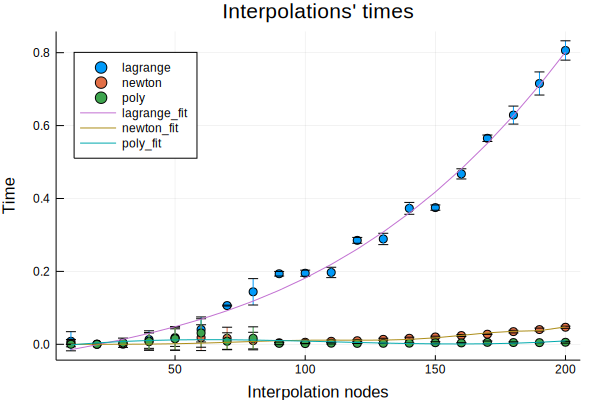

In [40]:
using Polynomials
using Plots

lagrange_fit=polyfit(df2[:size], df2[:lagrange_mean], 3)
newton_fit=polyfit(df2[:size], df2[:newton_mean], 10)
poly_fit=polyfit(df2[:size], df2[:poly_mean], 3)

scatter(df2[:size], [df2[:lagrange_mean], df2[:newton_mean], df2[:poly_mean]],
    yerr=[df2[:lagrange_std] df2[:newton_std] df2[:poly_std]], label=["lagrange" "newton" "poly"], 
    legend=:topleft)

plot!(df2[:size], polyval(lagrange_fit, df2[:size]), label="lagrange_fit")
plot!(df2[:size], polyval(newton_fit, df2[:size]), label="newton_fit")
plot!(df2[:size], polyval(poly_fit, df2[:size]), label="poly_fit")
title!("Interpolations' times")
xlabel!("Interpolation nodes")
ylabel!("Time")

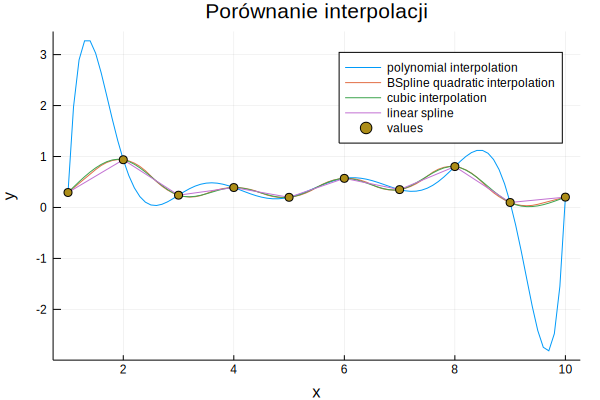

In [72]:
using Interpolations

xs = 1:10
ys = rand(10)

xfs = 1:0.1:10


fit1=polyfit(xs, ys)
p = [fit1(x) for x in xfs]

itp = interpolate(ys, BSpline(Quadratic(Line(OnCell()))))
q =[itp(x) for x in xfs]

itp = interpolate(ys, BSpline(Linear()))
l =[itp(x) for x in xfs]

interp_cubic = CubicSplineInterpolation(xs, ys)
c = [interp_cubic(x) for x in xfs]

plot(xfs, p, label="polynomial interpolation")
plot!(xfs, q, label="BSpline quadratic interpolation")
plot!(xfs, c, label="cubic interpolation")
plot!(xfs, l, label="linear spline")
scatter!(xs, ys, label="values")
title!("Porównanie interpolacji")
xlabel!("x")
ylabel!("y")

Poly(1.0000000000002585 + 6.759301960595224e-15*x + 0.07265777657848105*x^2 - 2.0148805700815642e-12*x^3 - 41.84540508167224*x^4 + 2.770375982491356e-11*x^5 + 158.4963718318772*x^6 - 2.0896022307291592e-10*x^7 + 88.4829394983139*x^8 + 7.524001175073359e-10*x^9 - 1701.9909571049009*x^10 - 1.3552397737337258e-9*x^11 + 3920.230937127504*x^12 + 1.1805612395788458e-9*x^13 - 3697.0347706345997*x^14 - 3.944569988363326e-10*x^15 + 1272.6160043646767*x^16)


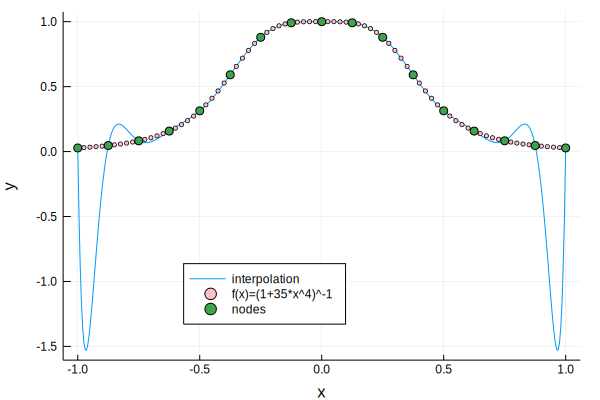

In [2]:
using Polynomials
using Plots

function f(x)
    return (1+35*x^4)^-1
end

xs = -1:0.125:1
ys = [f(x) for x in xs]

xsf = -1:0.005:1
fit1 = polyfit(xs, ys)
p_y_s = [fit1(x) for x in xsf]

f_xs = -1:0.025:1
f_ys = [f(x) for x in f_xs]

println(fit1)

plot(xsf, p_y_s, label="interpolation")

scatter!(f_xs, f_ys, label="f(x)=(1+35*x^4)^-1", color="pink", marker = (:dot, 2), legend =:bottom)
scatter!(xs, ys, label="nodes")
xlabel!("x")
ylabel!("y")

In [1]:
# resizing metodą najbliższego sąsiada
using Images, TestImages

function resize_image(image, new_w, new_h)
    w = length(image[1,:])
    h = length(image[:,1])
    
    x_ratio = w / new_w
    y_ratio = h / new_h
    
    tmp = zeros(RGB, new_h, new_w) 
    
    for i=0:new_w-1
        for j=0:new_h-1
            x = floor(Int, (i * x_ratio))
            y = floor(Int, (j * y_ratio))
            tmp[j + 1, i + 1] = image[y + 1, x + 1]
        end
    end
    return tmp
end

resize_image (generic function with 1 method)

In [2]:
# interpolate point at (x, y) from 4 nearby pixel values
function interp_bilinear_m(dat, x, y, x1, x2, y1, y2)
    q11 = dat[y1, x1]         
    q12 = dat[y2, x1]
    q21 = dat[y1, x2]
    q22 = dat[y2, x2]
    if x1 != x2
        r1 = (x2 - x) / (x2 - x1) * q11 + (x - x1) / (x2 - x1) * q21
        r2 = (x2 - x) / (x2 - x1) * q12 + (x - x1) / (x2 - x1) * q22
    else
        # special case of x1 == x2, no interpolation needed
        r1 = q11
        r2 = q12
    end
    if y1 != y2
        r = (y - y1) / (y2 - y1) * r1 + (y2 - y) / (y2 - y1) * r2
    else
        # special case of y1 == y2, no interpolation needed
        r = r1
    end
    if typeof(r) <: Real
        r = round(r)
    end
    r = convert(RGB, r)
    return r
end


function imresizeBinqa(dat, new_w, new_h)
    new_dat = similar(dat, new_w, new_h)
    h, w = size(dat)
    w = length(image[1,:])
    h = length(image[:,1])
    x_ratio = w / new_w
    y_ratio = h / new_h
    for i=1:new_w
        for j=1:new_h
            x = (i * x_ratio)
            y = j * y_ratio
            # coordinates of 4 points to interpolate from
            x1 = max(1, floor(Int,x))
            x2 = min(w, ceil(Int,x))
            y1 = max(1, floor(Int,y))
            y2 = min(h, ceil(Int,y))
            new_dat[j, i] = interp_bilinear_m(dat, floor(Int,x), floor(Int,y), x1, x2, y1, y2)
        end
    end
    return new_dat
end

imresizeBinqa (generic function with 1 method)

In [29]:
TestImages.remotefiles

34-element Array{String,1}:
 "autumn_leaves.png"                
 "blobs.gif"                        
 "cameraman.tif"                    
 "earth_apollo17.jpg"               
 "fabio_color_256.png"              
 "fabio_color_512.png"              
 "fabio_gray_256.png"               
 "fabio_gray_512.png"               
 "hela-cells.tif"                   
 "house.tif"                        
 "jetplane.tif"                     
 "lake.tif"                         
 "lena_color_256.tif"               
 ⋮                                  
 "m51.tif"                          
 "moonsurface.tiff"                 
 "mountainstream.png"               
 "mri-stack.tif"                    
 "multi-channel-time-series.ome.tif"
 "peppers_color.tif"                
 "peppers_gray.tif"                 
 "pirate.tif"                       
 "toucan.png"                       
 "walkbridge.tif"                   
 "woman_blonde.tif"                 
 "woman_darkhair.tif"               

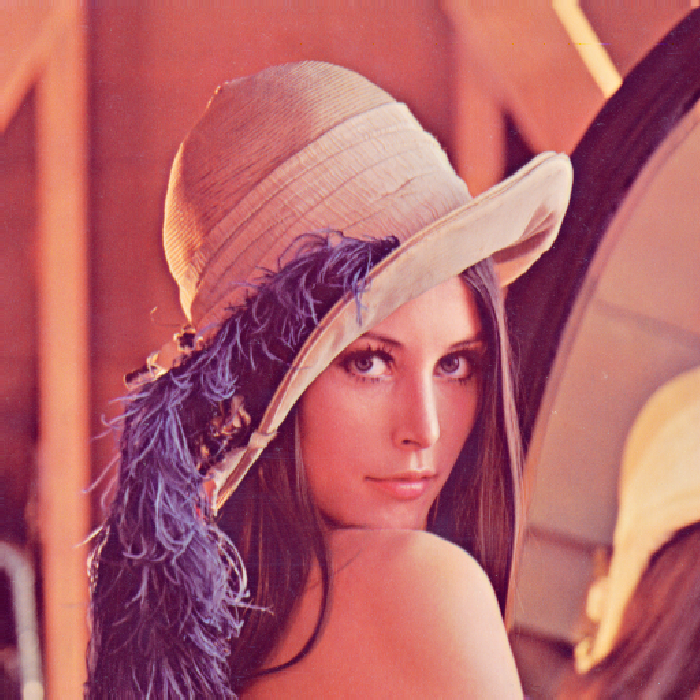

In [35]:
image = testimage("lena_color_512")
imresizeBinqa(image, 700,700)

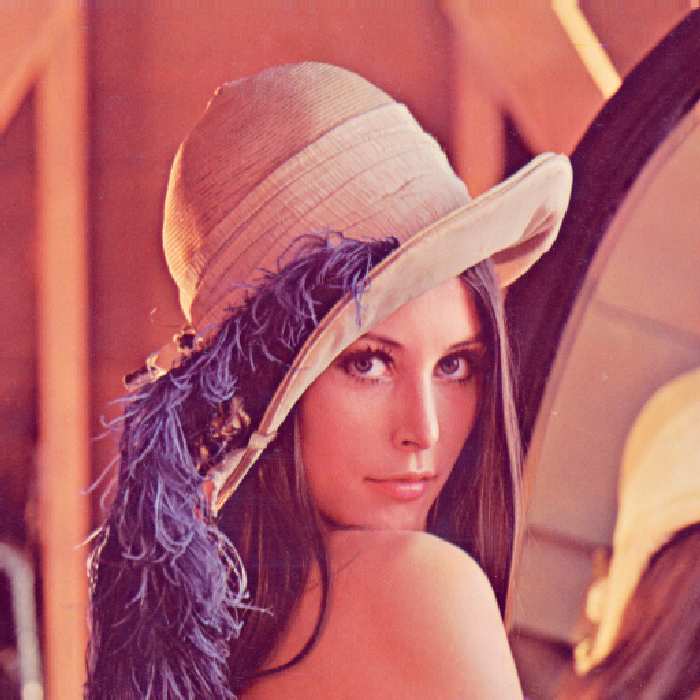

In [36]:
resize_image(image,700,700)

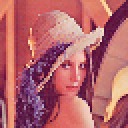

In [37]:
imresizeBinqa(image, 64,64)

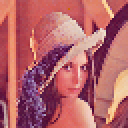

In [38]:
resize_image(image,64,64)